In [114]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math , copy
import numpy as np
import pandas as pd
import seaborn as sns


In [115]:
iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data , columns=iris_data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<Axes: >

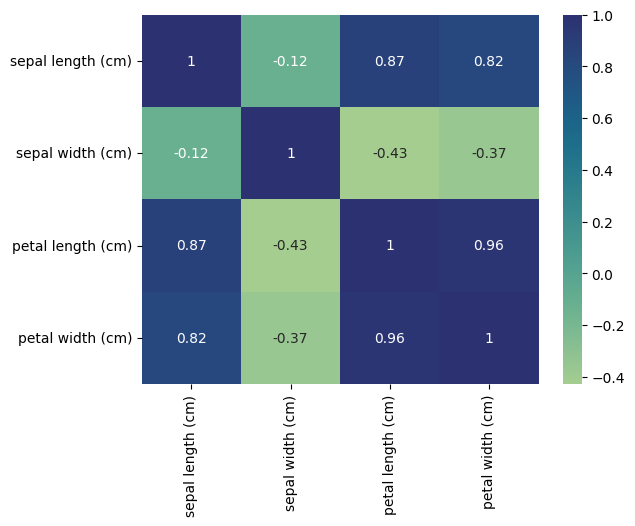

In [116]:
# By correlation matrix we can see that which elements are more co-related and more dependent to each other.
# Only pandas has the correlation matrix and appplied to dataframes
sns.heatmap(iris_df.corr() , annot=True, cmap="crest")

By this we can see that Values near the 1 are highly corelated and can give best results, and the values near the 0 are not related and -1 are highly unrelated to each other.
We can also see this by pairplot the whole data we have got.

we will define the Multivaraint Linear regression first and then we will define which values we have to take.
So checklist is:

1. Model - vectorization
2. Cost Function
3. Gradient Descent
4. Final W and B

Please Get the Model and Each and every Step Correct.! :)

In [117]:
# This model only wil work for a row only, means only 1 data which has X number of features.
def model(train_X , train_Y , init_w , init_b):
    f_wb = np.dot(train_X , init_w) + init_b
    return f_wb

In [118]:
def compute_cost(train_X , train_Y , init_w, init_b):
    # The shape will return the row + column in it.
    # We have to use len() for getting the rows and shape[0] for columns
    # m = train_X.shape

    m = len(train_X)
    cost = 0.0
    total_cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(train_X[i] , init_w) + init_b
        error_function =  ( f_wb_i - train_Y[i] ) ** 2
        total_cost += error_function
    cost = total_cost / (2 * m)
    return cost

In [119]:
def compute_gradient(train_X , train_Y , init_w , init_b):
    rows_training_examples , colmn_total_features = train_X.shape

    dj_dw = np.zeros((colmn_total_features,))
    dj_db = 0.

    for i in range(rows_training_examples):
        error = (np.dot(train_X[i] , init_w) + init_b) - train_Y[i]
        # print(train_Y)
        # This loop is for running all ove the features of it
        for j in range(colmn_total_features):
            dj_dw[j] += error * train_X[i , j]
        dj_db = dj_db + error
    
    dj_dw = dj_dw / rows_training_examples
    dj_db = dj_db / rows_training_examples

    return dj_dw , dj_db

The Main Logic behind this is:
- outer loop over all m examples :
    dj_db: for the example can be computed directly and accumulated
- in a second loop over all n features:
    dj_dw for i'th:  is computed for each w_i'th

In [120]:
def compute_gradient_descent(train_X , train_Y , init_w , init_b , cost_function, gradient_function , alpha, iterations):
    cost_history = []
    w = copy.deepcopy(init_w)
    b = init_b

    for i in range(iterations):

        dj_dw , dj_db  = gradient_function(train_X , train_Y , w , b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    
        if i < 10000:
            cost_history.append(cost_function(train_X , train_Y , w , b))
    
    return w , b , cost_history


In [121]:
#Defing the training and test datasets
#pd.concat on data frame only. 
train_X = pd.concat([iris_df['petal length (cm)'] , iris_df['petal width (cm)']] , axis = 1).to_numpy()
train_Y = pd.DataFrame(data=iris_data.target , columns=['species']).to_numpy()
# print(f'Training Data X: {train_X}')
# print('\n')
# print(f'Training Data Y: {train_Y}')

In [122]:
models = LinearRegression()
final = models.fit(pd.concat([iris_df['petal length (cm)'] , iris_df['petal width (cm)']] , axis = 1) ,pd.DataFrame(data=iris_data.target , columns=['species']) )
print(final.coef_)
print(final.intercept_)

[[0.17832294 0.63042101]]
[-0.42622255]


In [123]:
#Defining the Parameters 


own_w = np.random.rand(2,1)
own_b = 0.

iters = 1000
alpha = 0.003

w_final , b_final , cost_history = compute_gradient_descent(train_X , train_Y , own_w , own_b , compute_cost , compute_gradient , alpha , iters)

print(f'w_final : {w_final}')
print('\n')
print(f'b_final : {b_final}')


/var/folders/kl/jjk6r8ds0n53tpvd8bdtlkfm0000gq/T/ipykernel_20082/1437027133.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += error * train_X[i , j]


ValueError: setting an array element with a sequence.